# Домашня робота №9

# Незалежність та некорельованість
На цьому занятті ми розглянемо випадкові вектори, складені з випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Класи для 3D графіків

In [2]:
# Class that anables 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Class of color maps
from matplotlib import cm

# This line makes 3D plots in Jupyter Notebook interactive (uncomment to anable)
# %matplotlib notebook

## 2 Багатовимірний нормальний розподіл

Випадкова величина $\zeta$ має $k$-вимірний нормальний розподіл з вектором середніх $\mu$ та матрицею коваріацій $\Sigma$,
тобто $\zeta \sim N_k(\mu, \Sigma)$,
якщо її щільність дорівнює:
$$f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp \left\{ -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right\}.$$

Детальна інформація про клас `multivariate_normal` в [документації](https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.stats.multivariate_normal.html).

In [3]:
from scipy.stats import multivariate_normal, norm, bernoulli

### 2.1 Зміна матриці коваріацій

#### 2.1.1 Завдання 2.1.1

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 0 \\ 0\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}.$$

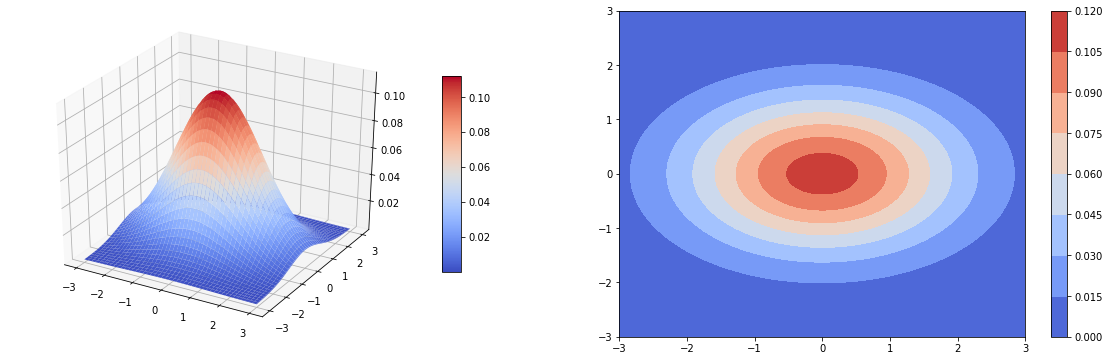

In [4]:
# Parameters of the distribution.
mean = [0, 0]
cov = [[2, 0],
       [0, 1]]

# Frozen random variable.
zeta = multivariate_normal(mean=mean, cov=cov)

# Make data.
x = np.arange(-3, 3.01, 0.01)
y = np.arange(-3, 3.01, 0.01)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))
z = zeta.pdf(pos)

# Prepare the figure.
fig = plt.figure(figsize=(20,6))

# Plot the surface.
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x,y,z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.6, aspect=10)

# Add contour plot of the surface.
ax2 = fig.add_subplot(122)
cont = ax2.contourf(x,y,z, cmap=cm.coolwarm)
fig.colorbar(cont)

plt.show()

#### 2.1.2 Завдання 2.1.2

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 1 \\ -1\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}.$$

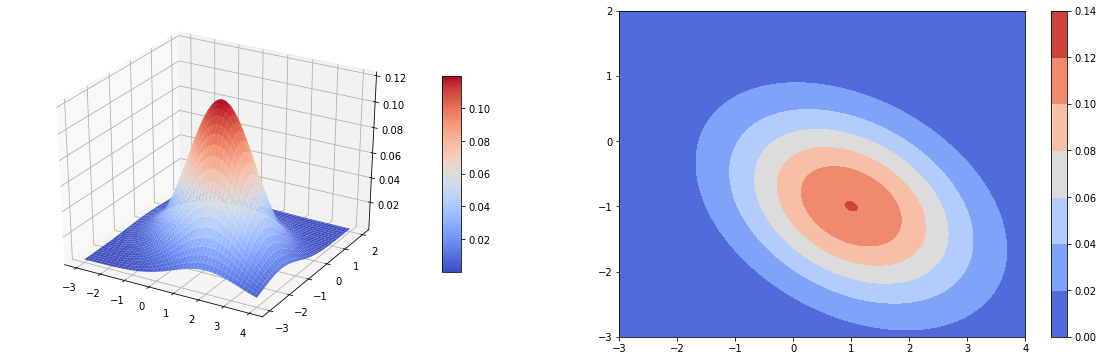

In [5]:
# Parameters of the distribution.
mean = [1, -1]
cov = [[2, -0.5],
       [-0.5, 1]]

# Frozen random variable.
zeta = multivariate_normal(mean=mean, cov=cov)

# Make data.
x = np.arange(-3, 4.01, 0.01)
y = np.arange(-3, 2.01, 0.01)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))
z = zeta.pdf(pos)

# Prepare the figure.
fig = plt.figure(figsize=(20,6))

# Plot the surface.
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x,y,z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.6, aspect=10)

# Add contour plot of the surface.
ax2 = fig.add_subplot(122)
cont = ax2.contourf(x,y,z, cmap=cm.coolwarm)
fig.colorbar(cont)

plt.show()

## 3 Некорельованість не означає незалежність

### 3.1 Задача 1.16.13

Нехай $Z = X Y$, де $X \sim N(0, 1)$ не залежить від $Y$ і $P(Y = 1) = P(Y = -1) = \frac{1}{2}$.
Покажіть, що $Z \sim N(0, 1)$ і що $X$ та $Z$ некорельовані, але залежні.
Знайдіть розподіл пар $(X, Z)$ та $(Y, Z)$, а також розподіл $X + Z$.

1. Згенеруйте $n = 100000$ значень випадкових величин $X, Y$;
2. Отримайте $n = 100000$ значень випадкової величини $Z$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $Z$;
   - функцію щільності випадкової величини $Z$.
4. Виведіть матрицю коваріацій між значеннями випадкових величин $X$ та $Z$.
5. Для значень $X$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $Y$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Зобразіть на графіку:
   - нормовану гістограму $n = 100000$ значень випадкової величини $X+Z$;
   - функцію щільності випадкової величини $X+Z$.

In [6]:
SIZE = 100000

#### №1, 2, 3

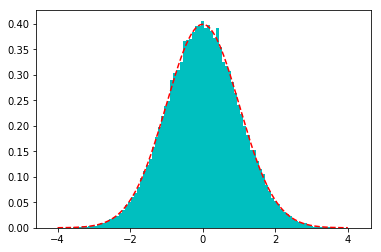

In [7]:
X = norm()
x_rvs = X.rvs(size=SIZE)
y_rvs = np.random.choice((-1, 1), size=SIZE)

x = np.arange(-4, 4.01, 0.01)

z_rvs = x_rvs * y_rvs
plt.hist(z_rvs, density=True, bins=100, color='c')
plt.plot(x, norm.pdf(x), 'r--')

plt.show()

#### №4

In [8]:
np.cov(x_rvs, z_rvs)

array([[ 0.99454503, -0.00233536],
       [-0.00233536,  0.99457249]])

In [11]:
def bar3d(x, y, x_range, y_range, n_bins):
    n = SIZE
    
    fig = plt.figure(figsize=(20,7))
    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)


    # Compute the bi-dimensional histogram
    xy_range = [x_range, y_range]
    hist, xedges, yedges = np.histogram2d(x, y, bins=n_bins, range=xy_range)

    # Construct arrays for the anchor positions of the bars.
    xpos1, ypos1 = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
    xpos = xpos1.ravel()
    ypos = ypos1.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the bars.
    dx = dy = 0.2 * np.ones_like(zpos)
    dz = hist.ravel()
    x_length = (x_range[1] - x_range[0]) / n_bins
    y_length = (y_range[1] - y_range[0]) / n_bins
    dz_normed = dz / (n * x_length * y_length)

    # Make color map with 8 colors
    colors = cm.get_cmap('viridis', 8)

    # Plot 3D histogram
    ax1.bar3d(xpos, ypos, zpos, dx, dy, dz_normed, color=colors(dz_normed / dz_normed.max()), zsort='average')

    # Add color bar
    colourMap = plt.cm.ScalarMappable(cmap=colors)
    colourMap.set_array(dz_normed)
    colBar = plt.colorbar(colourMap)

    # Make contour plot
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    normed_hist = hist / (n * x_length * y_length)
    ax2.contourf(xcenters, ycenters, normed_hist, cmap=colors)

    ax3.plot(x, y, 'o', markersize=1)
    
    ax1.set_title('Normed 3D histogram')
    ax2.set_title('Filled 2D counter plot')
    ax3.set_title('Scatter plot')
    plt.show()

#### №5

(X, Z) distribution:


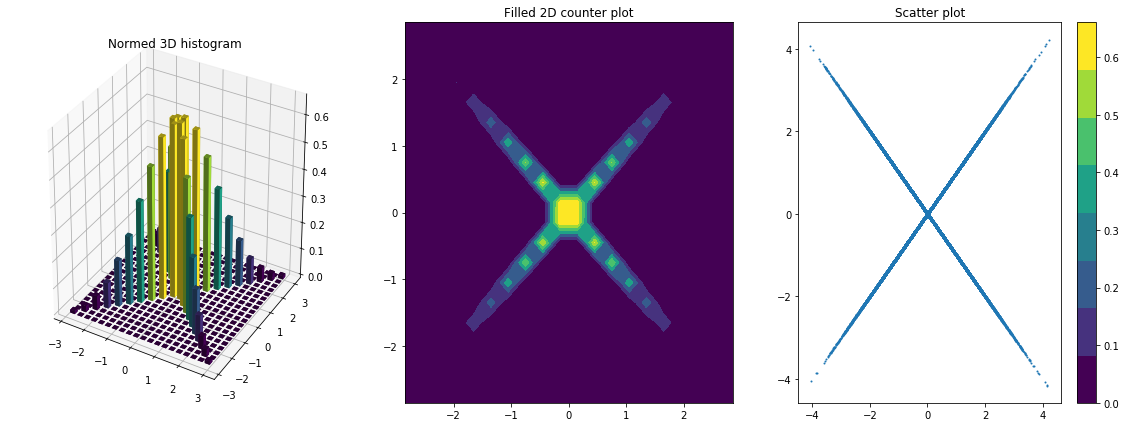

In [12]:
print('(X, Z) distribution:')
bar3d(x_rvs, z_rvs, x_range=[-3, 3], y_range=[-3, 3], n_bins=20)

#### №6

(Y, Z) distribution:


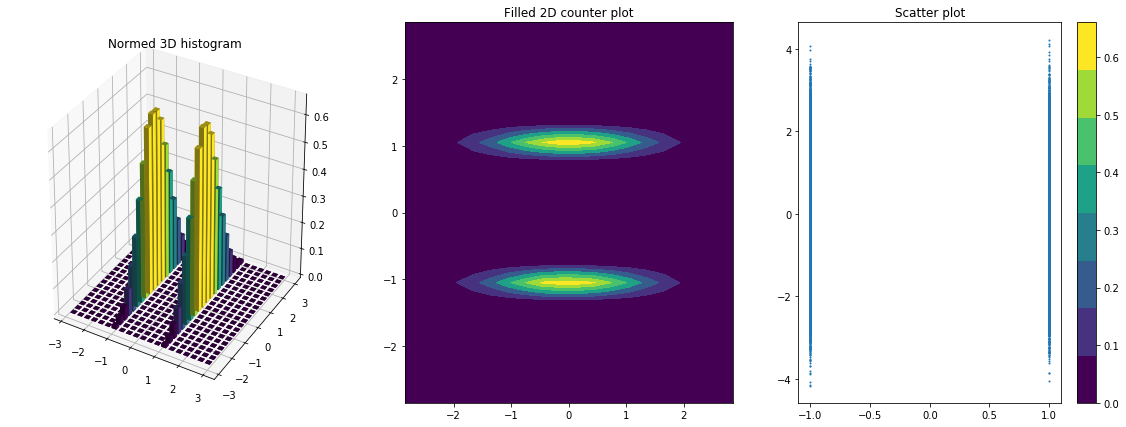

In [13]:
print('(Y, Z) distribution:')
bar3d(y_rvs, z_rvs, x_range=[-3, 3], y_range=[-3, 3], n_bins=20)

#### №7

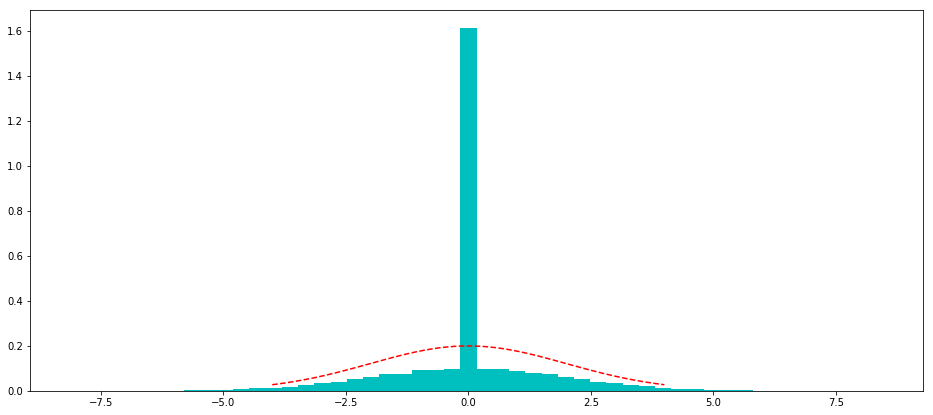

In [16]:
plt.figure(figsize=(16, 7))
plt.hist(x_rvs + z_rvs, density=True, bins=50, color='c')
plt.plot(x, norm(0, 2).pdf(x), 'r--')
plt.show()

## 4 Незалежність випадкових величин з Домашньої роботи №8

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= \frac{\xi_1}{\xi_1 + \xi_2} \sim Uniform(0, 1), \\
\zeta_2 &= \xi_1 + \xi_2 \sim \Gamma(2)
\end{aligned}
$$
незалежні.
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 100000$ значень випадкових величин $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.
5. Для значень двох незалежних випадкових величин $\eta_1 \sim Uniform(0, 1), \eta_2 \sim \Gamma(2)$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.

In [4]:
# Місце для Вашого коду



## 5 Генерування залежних випадкових величин

### 5.1 Нормальний розподіл

Нехай $\zeta = (\zeta_1, \zeta_2)^T \sim N_2(\textbf{0}, I)$, тобто $\zeta_1, \zeta_2 \sim N(0, 1)$ &mdash; незалежні,
$A$ &mdash; матриця $2 \times 2$, $m$ &mdash; вектор $2 \times 1$.
Тоді
$$A \zeta + m \sim N_2 (m, A A^T).$$

#### 5.1.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Згенеруйте випадковий вектор $\zeta = (\zeta_1, \zeta_2)$ з $2$-вимірного нормального розподілу з параметрами
$$
\mu = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}
$$
за допомогою лінійного перетворення випадкових величин $\xi_1, \xi_2$ та розкладу Холецького матриці $\Sigma$.

1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2 \sim N(0,1)$;
2. Отримайте $n = 100000$ значень $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

In [5]:
# Місце для Вашого коду



### 5.2 Експоненційний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.2.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $u_1, u_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $u_1, u_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Тоді
$$
\begin{aligned}
\xi_1 &= F^{-1}(u_1) \sim Exp(1), \\
\xi_2 &= F^{-1}(u_2) \sim Exp(1), \\
\xi_1^a &= F^{-1}(1-u_1) \sim Exp(1), \\
\xi_2^a &= F^{-1}(1-u_2) \sim Exp(1),
\end{aligned}
$$
де $F$ &mdash; функція розподілу стандартного експоненційного розподілу.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= (1 - p) \xi_1 + \eta_1 \xi_2 \sim Exp(1), \\
\zeta_2 &= (1 - p) \xi_2^a + \eta_2 \xi_1^a \sim Exp(1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&2 p (1 - p)(-0.6449) - (1 - p)^2, & p \geq 1/2, \\
&2 p (1 - p)(-0.6449) - p^2, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $u_1, u_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\xi_1, \xi_2, \xi_1^a, \xi_2^a, \zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1^a$;
   - функцію щільності випадкової величини $\xi_1^a$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2^a$;
   - функцію щільності випадкової величини $\xi_2^a$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

In [6]:
# Місце для Вашого коду



### 5.3 Рівномірний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.3.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $\xi_1, \xi_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= 1 - \xi_1^{(1 - p)} \xi_2^{\eta_1} \sim Uniform(0, 1), \\
\zeta_2 &= 1 - (1-\xi_2)^{(1 - p)} (1-\xi_1)^{\eta_2} \sim Uniform(0, 1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&\frac{-3 (1-p) (4 + 5(1-p) + 6(1-p)^2 + (1-p)^3)}{(2-p)^2 (3-p)^2}, & p \geq 1/2, \\
&\frac{-3 p (2 + 3(1-p) - (1-p)^2)}{(2-p)^2 (3-p)}, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

In [7]:
# Місце для Вашого коду

